In [36]:
import re
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

## Read and Process Data

In [17]:
df = pd.read_excel("/content/datasetwlink-clearninghouse-cnt-final.xlsx")
df.head()

,case id,complaint count,appeal count,docket count,case types
0,12004,1,2,72,Education
1,16745,2,23,40,Jail Conditions
2,15851,2,2,227,Criminal Justice (Other)
3,8641,0,1,17,Equal Employment
4,14759,1,1,0,Prison Conditions


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1393 entries, 0 to 1392
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   case id          1393 non-null   int64 
 1   complaint count  1393 non-null   int64 
 2   appeal count     1393 non-null   int64 
 3   docket count     1393 non-null   int64 
 4   case types       1393 non-null   object
dtypes: int64(4), object(1)
memory usage: 54.5+ KB


In [19]:
main_df = pd.read_excel("/content/DatasetWLink-ClearningHouse.xlsx")
main_df.head()

,列1,doc_id,case_summary,text,file,列2
0,12004.0,43028.0,"<p>On February 16, 2010 several students and p...",Case:C 1a1s-e135:11000- c v - 00056/1411/-2S0...,doc/43028.pdf,2512.0
1,16745.0,101734.0,"<p>On August 20, 2018, 23 inmates at the Pulas...",Case 4:18-cv-00541-JM-JTR Document 20 File...,doc/101734.pdf,6762.0
2,16745.0,108694.0,"<p>On August 20, 2018, 23 inmates at the Pulas...",Case 4:18-cv-00541-JM Document 23 Filed 06...,doc/108694.pdf,14884.0
3,16745.0,101732.0,"<p>On August 20, 2018, 23 inmates at the Pulas...",\n############# New Text on 20240821 #########...,doc/101732.pdf,12090.0
4,16745.0,101781.0,"<p>On August 20, 2018, 23 inmates at the Pulas...","CLOSED,CASREF,JURY,RD,REOPEN\nU.S. District Co...",doc/101781.pdf,8551.0


In [20]:
# process main_df
main_df.rename({"列1":"case id", "列2": "document length"}, inplace=True, axis=1) # rename columns

# drop nan row on doc_id, convert count columns to ints
main_df = main_df[main_df['doc_id'].notna()]
float_cols = main_df.select_dtypes(include='float').columns
main_df[float_cols] = main_df[float_cols].astype(int)
main_df.head()

<ipython-input-20-55b23ca084ee>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  main_df[float_cols] = main_df[float_cols].astype(int)


,case id,doc_id,case_summary,text,file,document length
0,12004,43028,"<p>On February 16, 2010 several students and p...",Case:C 1a1s-e135:11000- c v - 00056/1411/-2S0...,doc/43028.pdf,2512
1,16745,101734,"<p>On August 20, 2018, 23 inmates at the Pulas...",Case 4:18-cv-00541-JM-JTR Document 20 File...,doc/101734.pdf,6762
2,16745,108694,"<p>On August 20, 2018, 23 inmates at the Pulas...",Case 4:18-cv-00541-JM Document 23 Filed 06...,doc/108694.pdf,14884
3,16745,101732,"<p>On August 20, 2018, 23 inmates at the Pulas...",\n############# New Text on 20240821 #########...,doc/101732.pdf,12090
4,16745,101781,"<p>On August 20, 2018, 23 inmates at the Pulas...","CLOSED,CASREF,JURY,RD,REOPEN\nU.S. District Co...",doc/101781.pdf,8551


In [21]:
aggregated = main_df.groupby('case id').agg(
    doc_count=('doc_id', 'count'),
    doc_len_sum=('document length', 'sum')
).reset_index()

In [22]:
aggregated.head()

,case id,doc_count,doc_len_sum
0,20,1,14551
1,34,1,32765
2,39,5,65356
3,45,3,98295
4,51,13,334884


In [23]:
final_df = df.merge(aggregated, on='case id', how='left')
final_df.head()

,case id,complaint count,appeal count,docket count,case types,doc_count,doc_len_sum
0,12004,1,2,72,Education,1,2512
1,16745,2,23,40,Jail Conditions,6,49406
2,15851,2,2,227,Criminal Justice (Other),7,219455
3,8641,0,1,17,Equal Employment,3,37055
4,14759,1,1,0,Prison Conditions,2,51021


## Data Analysis

In [24]:
df = final_df.copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1393 entries, 0 to 1392
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   case id          1393 non-null   int64 
 1   complaint count  1393 non-null   int64 
 2   appeal count     1393 non-null   int64 
 3   docket count     1393 non-null   int64 
 4   case types       1393 non-null   object
 5   doc_count        1393 non-null   int64 
 6   doc_len_sum      1393 non-null   int64 
dtypes: int64(6), object(1)
memory usage: 76.3+ KB


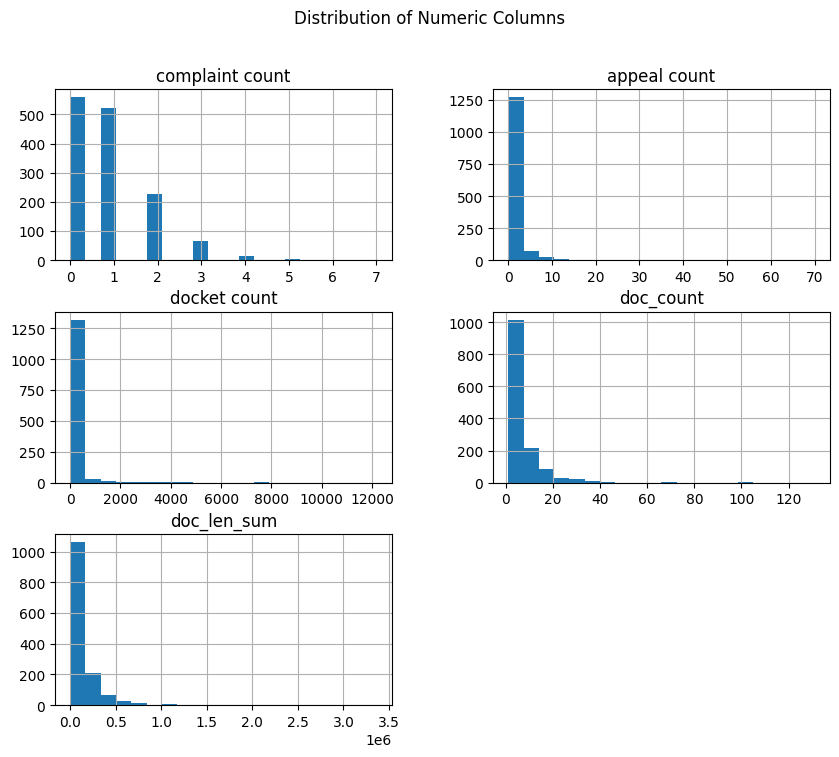

In [25]:
## See Distribution of Numeric Columns
numeric_columns = ['complaint count', 'appeal count', 'docket count', 'doc_count', 'doc_len_sum']

# Histograms
df[numeric_columns].hist(bins=20, figsize=(10, 8))
plt.suptitle("Distribution of Numeric Columns")
plt.show()


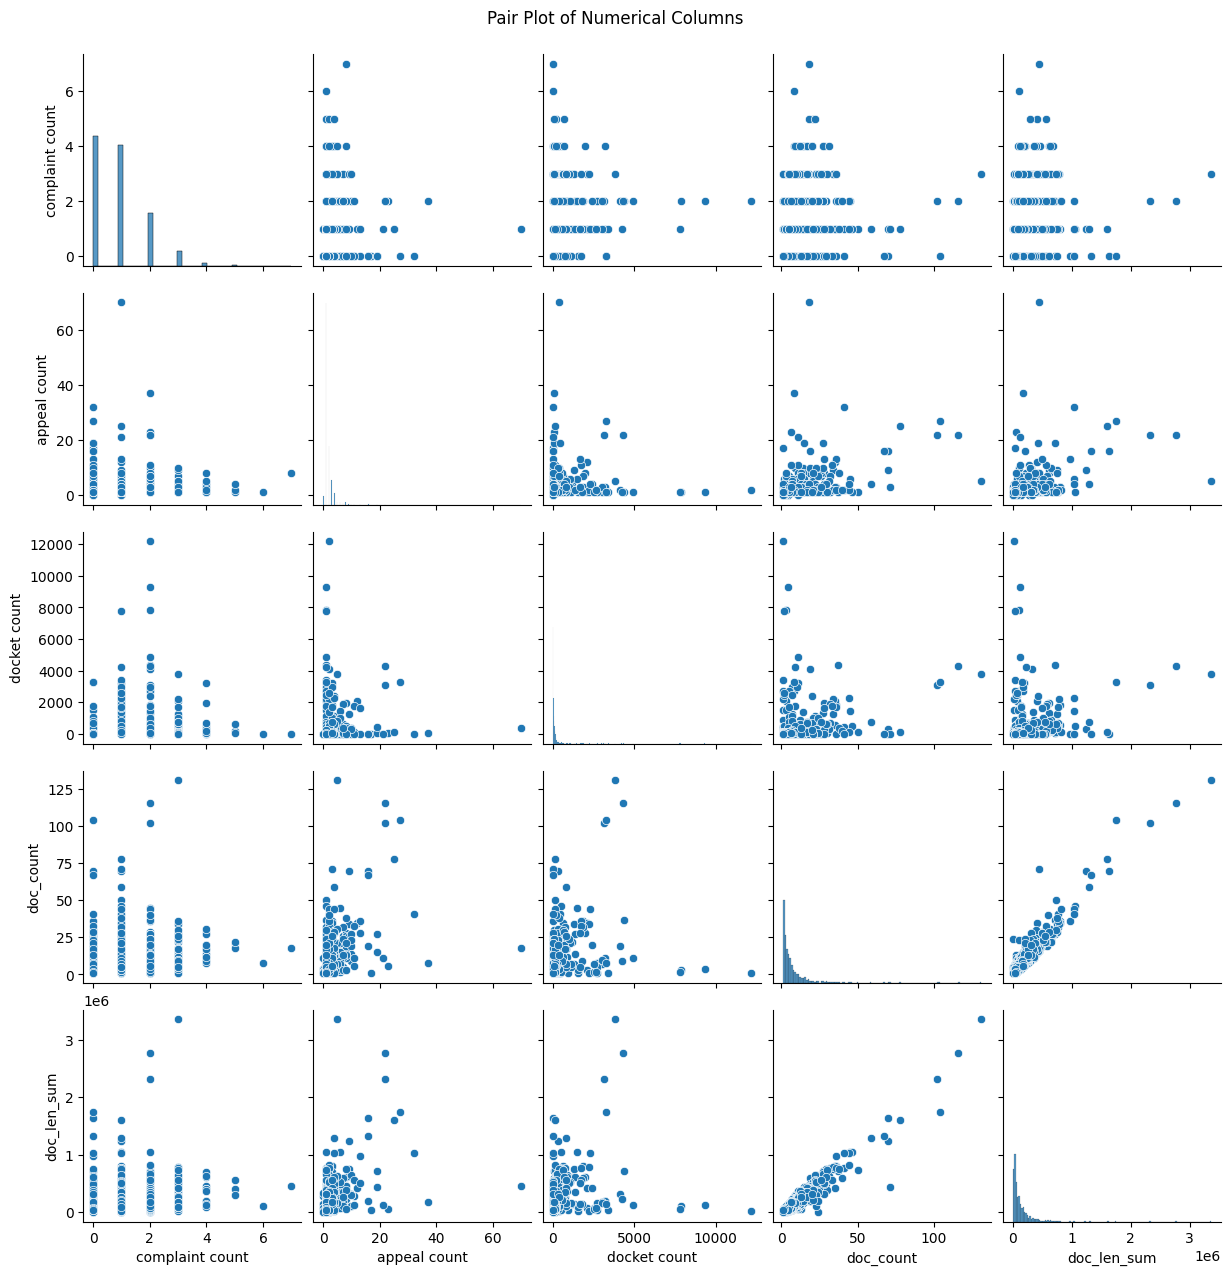

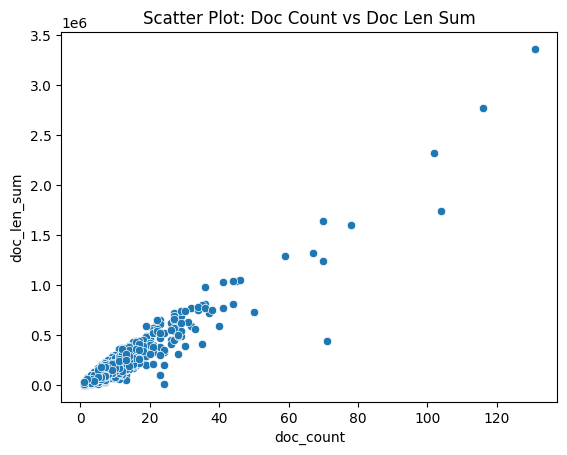

In [26]:
# Pairplot to check corrleration
sns.pairplot(df[numeric_columns])
plt.suptitle("Pair Plot of Numerical Columns", y=1.02)
plt.show()

# Scatter plot example
sns.scatterplot(x='doc_count', y='doc_len_sum', data=df)
plt.title("Scatter Plot: Doc Count vs Doc Len Sum")
plt.show()


In [27]:
df[numeric_columns].corr()

,complaint count,appeal count,docket count,doc_count,doc_len_sum
complaint count,1.000000,0.019419,0.175849,0.263598,0.264582
appeal count,0.019419,1.000000,0.113470,0.451507,0.452289
docket count,0.175849,0.113470,1.000000,0.281655,0.299153
doc_count,0.263598,0.451507,0.281655,1.000000,0.952936
doc_len_sum,0.264582,0.452289,0.299153,0.952936,1.000000


#### Case Type Analysis

In [28]:
# Define a threshold for grouping rare categories
threshold = 40  # Example: Categories with <=40 occurrences will be grouped

case_type_counts = df['case types'].value_counts()
df['case types'] = df['case types'].apply(
    lambda x: x if case_type_counts[x] > threshold else 'Other'
)

# Check the new grouped values
print(df['case types'].value_counts())


case types
Equal Employment                       493
Other                                  403
Prison Conditions                      133
Immigration and/or the Border           97
Jail Conditions                         91
Public Benefits/Government Services     68
Election/Voting Rights                  57
Policing                                51
Name: count, dtype: int64


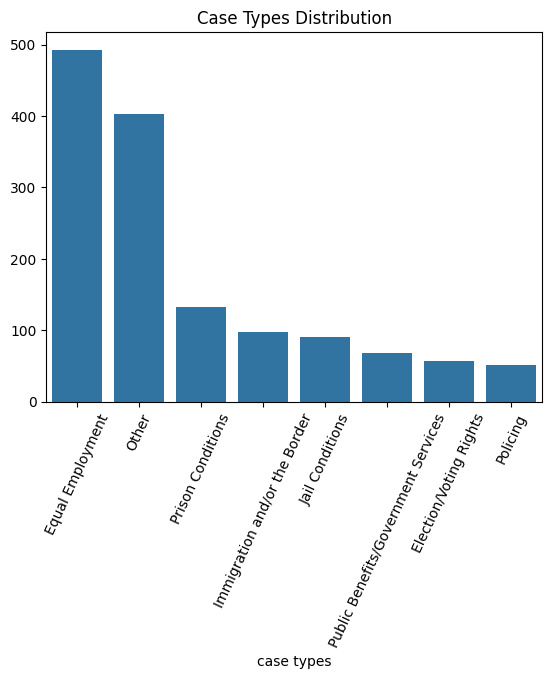

In [29]:
# Bar Plot
case_type_counts = df['case types'].value_counts()
sns.barplot(x=case_type_counts.index, y=case_type_counts.values)
plt.title("Case Types Distribution")
plt.xticks(rotation=65)
plt.show()


### Analysis Of Trend Between Case Type and Other Columns

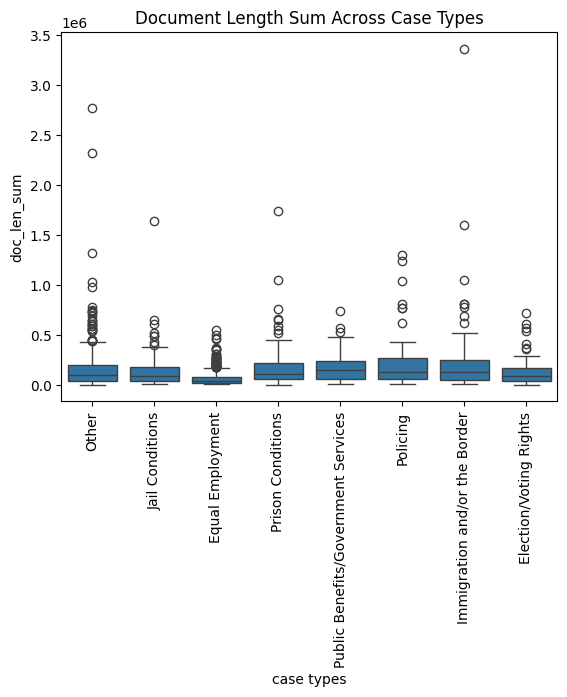

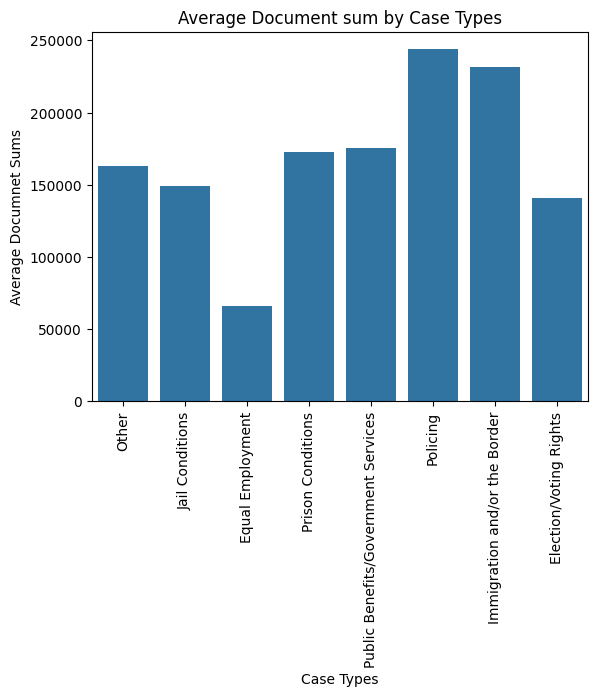

In [31]:
## How does case type document length
sns.boxplot(x='case types', y='doc_len_sum', data=df)
plt.xticks(rotation=90)
plt.title("Document Length Sum Across Case Types")
plt.show()

sns.barplot(data=df, x='case types', y='doc_len_sum', errorbar=None)
plt.title("Average Document sum by Case Types")
plt.xlabel("Case Types")
plt.ylabel("Average Documnet Sums")
plt.xticks(rotation=90)
plt.show()


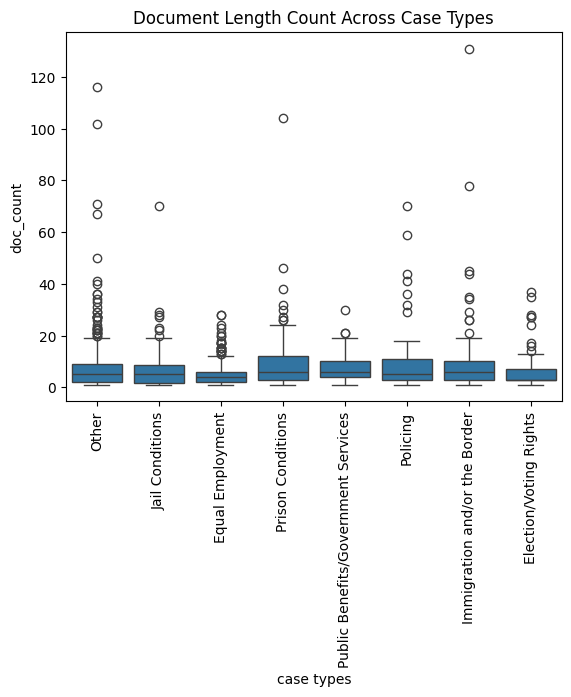

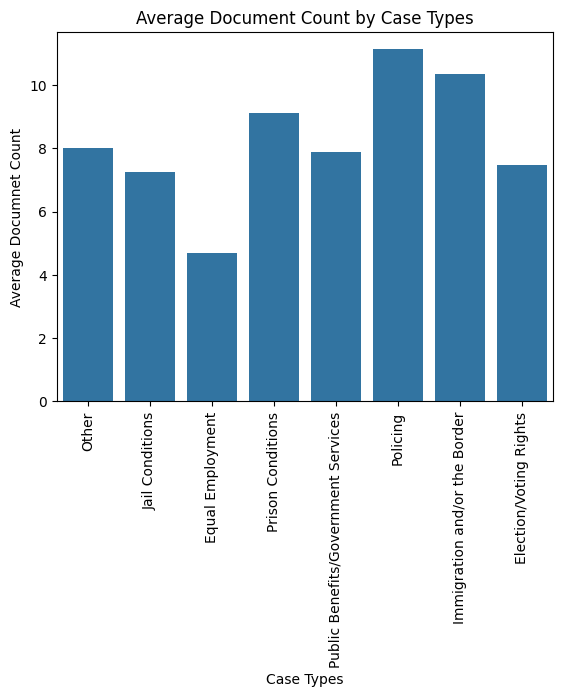

In [32]:
# How does case type affect document count
sns.boxplot(x='case types', y='doc_count', data=df)
plt.xticks(rotation=90)
plt.title("Document Length Count Across Case Types")
plt.show()

sns.barplot(data=df, x='case types', y='doc_count', errorbar=None)
plt.title("Average Document Count by Case Types")
plt.xlabel("Case Types")
plt.ylabel("Average Documnet Count")
plt.xticks(rotation=90)
plt.show()


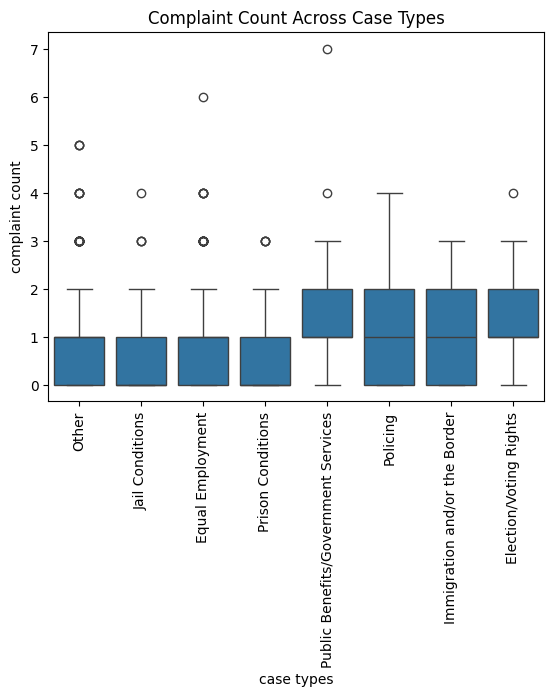

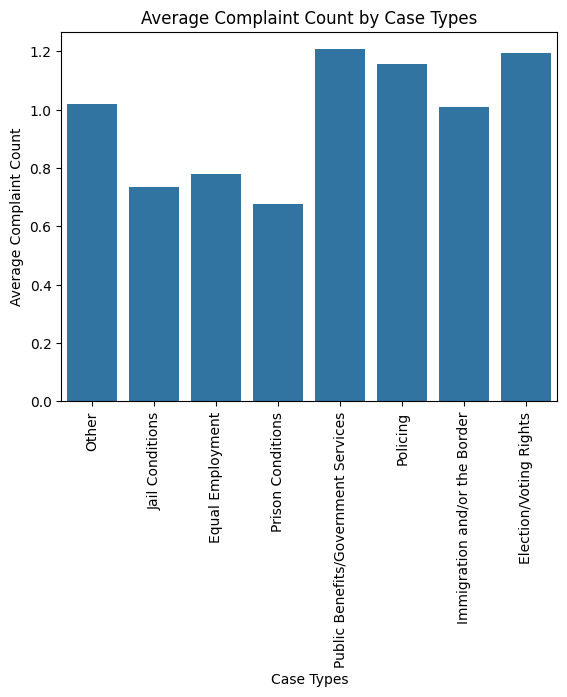

In [33]:
# How does complaint count relate to case type
sns.boxplot(x='case types', y='complaint count', data=df)
plt.xticks(rotation=90)
plt.title("Complaint Count Across Case Types")
plt.show()

sns.barplot(data=df, x='case types', y='complaint count', errorbar=None)
plt.title("Average Complaint Count by Case Types")
plt.xlabel("Case Types")
plt.ylabel("Average Complaint Count")
plt.xticks(rotation=90)
plt.show()


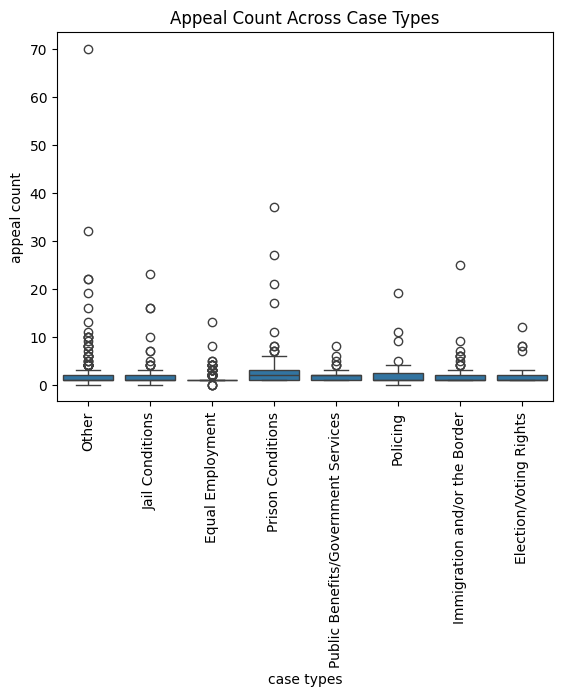

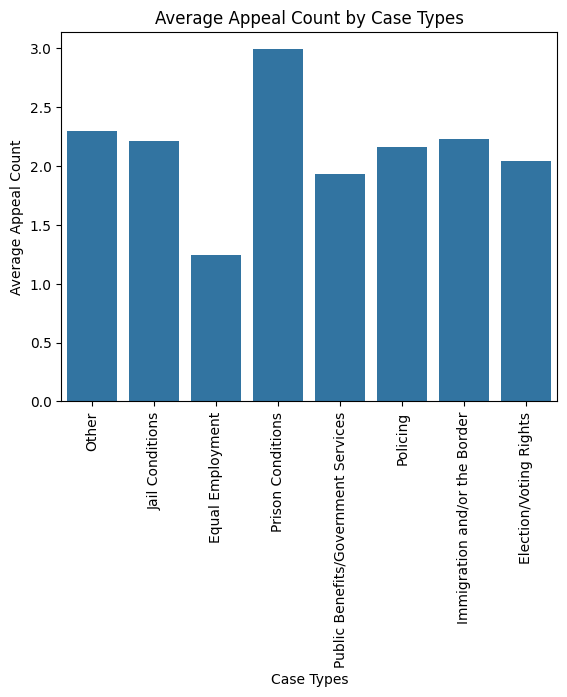

In [34]:
# How does appeal count relate to case type
sns.boxplot(x='case types', y='appeal count', data=df)
plt.xticks(rotation=90)
plt.title("Appeal Count Across Case Types")
plt.show()

sns.barplot(data=df, x='case types', y='appeal count', errorbar=None)
plt.title("Average Appeal Count by Case Types")
plt.xlabel("Case Types")
plt.ylabel("Average Appeal Count")
plt.xticks(rotation=90)
plt.show()


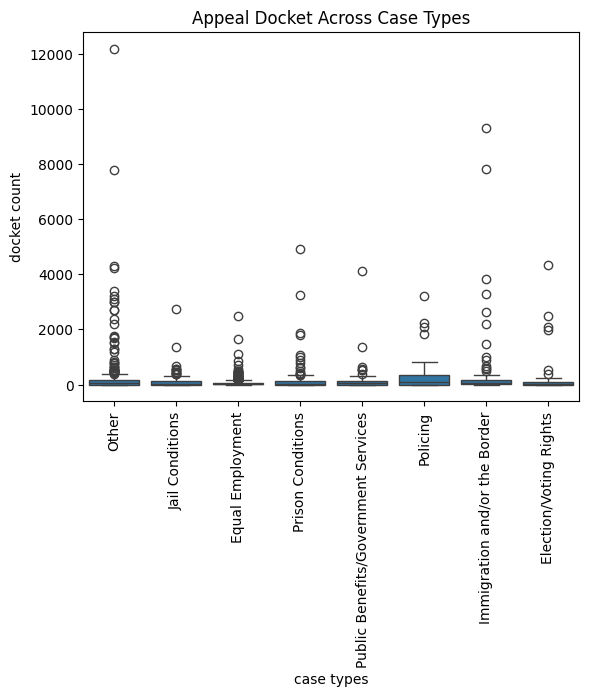

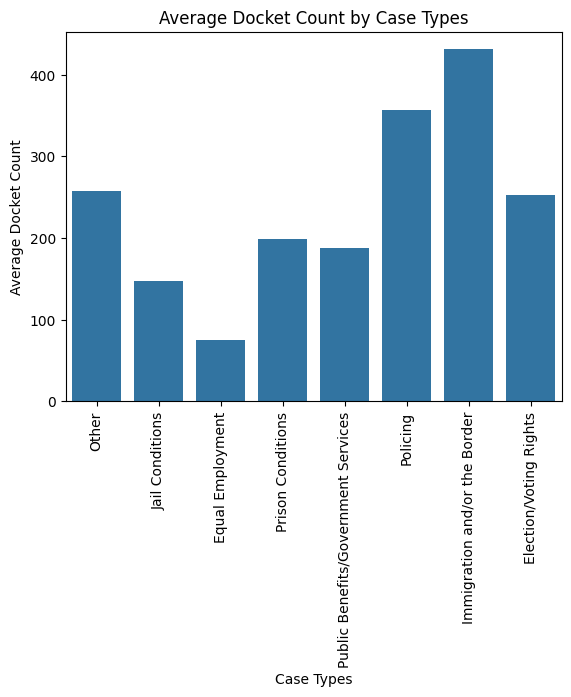

In [35]:
# How does docket count relate to case type
sns.boxplot(x='case types', y='docket count', data=df)
plt.xticks(rotation=90)
plt.title("Appeal Docket Across Case Types")
plt.show()

sns.barplot(data=df, x='case types', y='docket count', errorbar=None)
plt.title("Average Docket Count by Case Types")
plt.xlabel("Case Types")
plt.ylabel("Average Docket Count")
plt.xticks(rotation=90)
plt.show()


## Summary of Results

- There is high positive correlation betwwen case document length and case document counts
- There is a moderate positive correlation between appeal count and docoument count/document length in a case
- There is a very minor insignificant correlation betwwen docket entries count in a case and the case lengths and count.
- Policing and immgration cases tend to generally have higher document lengths. Equal employment cases are generally short
- Prison condition cases tend to contain more documents than policing and immigration cases. Given the last point, we could say that individual lengths of policing and immigration case documents are generally longer
- More complaints are seen in public benefit cases followed by election/voting cases.
- Prison condition cases contain more appeals followed by policing documents then immigration documents
- Policing cases generally contain more docket entries than others.

## Calculate Difficulty -

Formula Based on role prompting GPT -


```
Difficulty Score = 0.167C + 0.222A + 0.278D + 0.167N + 0.333L
```



Prompt:
```
You are a legal expert. Given the following features of a case document in the legal document. Which of these features makes it more difficult to summarize cases? Specifically, I want to measure difficulty as a weighted sum of these features. What weights do you think I should use.

Features:
Number of complaints in a case
number of appeals in a case
number of docket entries in a case
case types
Number of documents in a case file  
Sum of all the length of all documents in a case file
```



In [38]:
df['difficulty'] = (df['doc_len_sum'] * 0.333) + (df['appeal count'] * 0.167) + (df['docket count'] * 0.228) + (df['complaint count'] * 0.167) + (df['appeal count'] * 0.222)

# Normalize the score
df['difficulty'] = (df['difficulty'] - df['difficulty'].min()) / (df['difficulty'].max() - df['difficulty'].min())

# Create difficulty category based on normalized score
conditions = [
    (df['difficulty'] < 0.33),  # Easy cases
    (df['difficulty'] >= 0.33) & (df['difficulty'] < 0.66),  # Medium cases
    (df['difficulty'] >= 0.66)  # Hard cases
]
choices = ['Easy', 'Medium', 'Hard']
df['case_difficulty'] = np.select(conditions, choices)

# Show the resulting difficulty classification
print(df[['case id', 'case_difficulty']].head())


   case id case_difficulty
0    12004            Easy
1    16745            Easy
2    15851            Easy
3     8641            Easy
4    14759            Easy


<ipython-input-41-d459621a985f>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='case types', y='difficulty', palette='coolwarm')


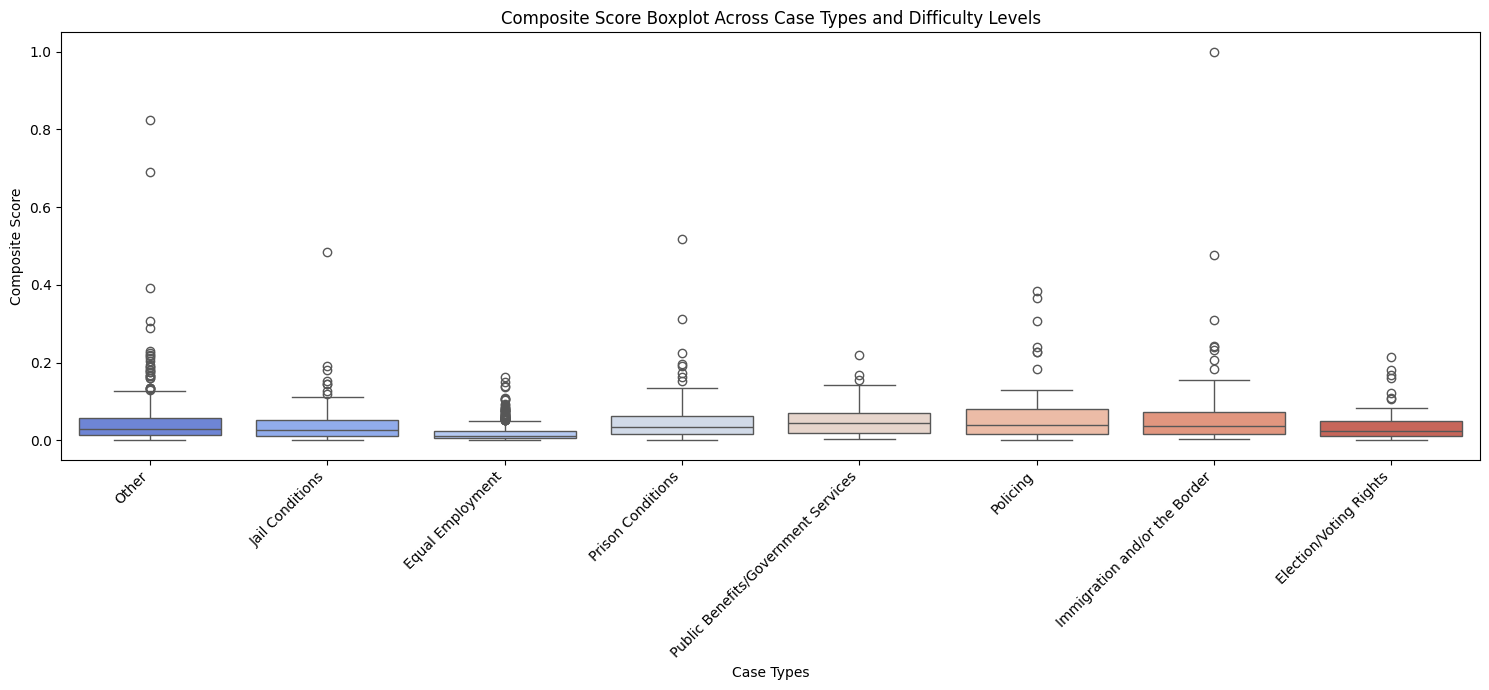

In [41]:
plt.figure(figsize=(15, 7))
sns.boxplot(data=df, x='case types', y='difficulty', palette='coolwarm')
plt.title('Composite Score Boxplot Across Case Types and Difficulty Levels')
plt.ylabel('Composite Score')
plt.xlabel('Case Types')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


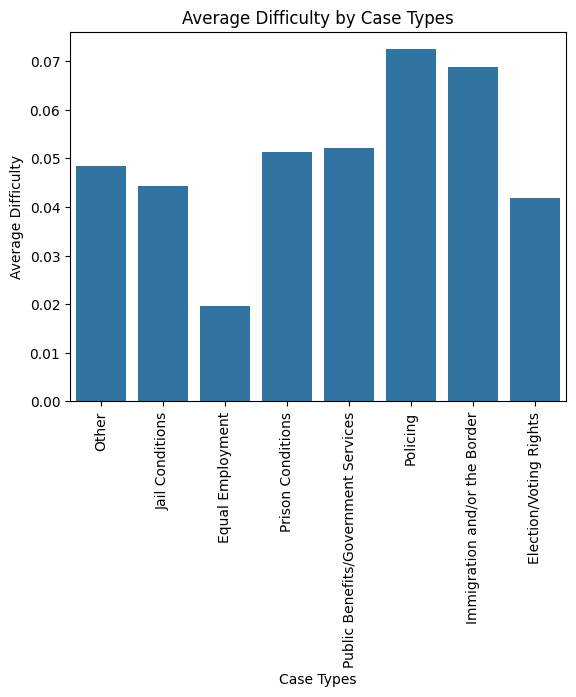

In [42]:
# difficulty_counts.plot(kind='bar', stacked=True, figsize=(15, 7), colormap='viridis')
# plt.title('Case Difficulty Across Case Types')
# plt.ylabel('Number of Cases')
# plt.xlabel('Case Types')
# plt.legend(title='Difficulty', loc='upper right')
# plt.xticks(rotation=45, ha='right')
# plt.tight_layout()
# plt.show()

sns.barplot(data=df, x='case types', y='difficulty', errorbar=None)
plt.title("Average Difficulty by Case Types")
plt.xlabel("Case Types")
plt.ylabel("Average Difficulty")
plt.xticks(rotation=90)
plt.show()

In [49]:
def process_data(crawl_file_path: str = "/content/datasetwlink-clearninghouse-cnt-final.xlsx", main_file_path:str = "/content/DatasetWLink-ClearningHouse.xlsx") -> pd.DataFrame:

  df = pd.read_excel(crawl_file_path)
  main_df = pd.read_excel(main_file_path)

  # process main_df
  main_df.rename({"列1":"case id", "列2": "document length"}, inplace=True, axis=1) # rename columns

  # drop nan row on doc_id, convert count columns to ints
  main_df = main_df[main_df['doc_id'].notna()]
  float_cols = main_df.select_dtypes(include='float').columns
  main_df[float_cols] = main_df[float_cols].astype(int)

  aggregated = main_df.groupby('case id').agg(
      doc_count=('doc_id', 'count'),
      doc_len_sum=('document length', 'sum')
      ).reset_index()

  final_df = df.merge(aggregated, on='case id', how='left')
  df = final_df.copy()
  return df


In [127]:
def calculate_difficulty(df: pd.DataFrame) -> pd.DataFrame:
  df = df.copy()
  df['difficulty'] = (df['doc_len_sum'] * 0.333) + (df['appeal count'] * 0.167) + (df['docket count'] * 0.228) + (df['complaint count'] * 0.167) + (df['appeal count'] * 0.222)

  # Normalize the score
  df['difficulty'] = (df['difficulty'] - df['difficulty'].min()) / (df['difficulty'].max() - df['difficulty'].min())

  # Create difficulty category based on normalized score
  conditions = [
      (df['difficulty'] < 0.33),  # Easy cases
      (df['difficulty'] >= 0.33) & (df['difficulty'] < 0.66),  # Medium cases
      (df['difficulty'] >= 0.66)  # Hard cases
  ]
  choices = ['Easy', 'Medium', 'Hard']
  df['case_difficulty'] = np.select(conditions, choices)

  print(df.describe())
  return df


In [128]:
def filter_data_based_on_difficulty(df_with_difficulty: pd.DataFrame, n: int = 6, random_state=42) -> pd.DataFrame:
    #make sure n is divisible by 3
    if n%3 != 0:
      raise ValueError("n must be divisible by 3")
    num_per_group = n // 3
    print(num_per_group)

    # select hardest and easiest questions
    hardest_cases = df_with_difficulty.nlargest(num_per_group, 'difficulty')  # Top 2 hardest cases (largest difficulty)
    easiest_cases = df_with_difficulty.nsmallest(num_per_group, 'difficulty')  # Top 2 easiest cases (smallest difficulty)

    # Filter medium difficulty cases
    medium_cases = df_with_difficulty[df_with_difficulty['case_difficulty'] == 'Medium']
    print(medium_cases)
    print(hardest_cases)

    # Randomly select 2 medium difficulty cases
    medium_cases_random = medium_cases.sample(n=num_per_group, random_state=random_state)

    # Concatenate the selected cases
    selected_data = pd.concat([hardest_cases, easiest_cases, medium_cases_random], ignore_index=True)

    return selected_data

complete this

def filter_data_based_on_difficulty(df_with_difficulty: pd.DataFrame, main_file_path: str) -> pd.DataFrame:
  

first the two hardest, two easiest and random two midum questions. There is difficulty column with raw diificulty number and also case difficulty column with difficulty class - easy hard and m

Data Sampling Analysis

In [43]:
print(df[['doc_len_sum', 'doc_count', 'docket count', 'appeal count', 'complaint count']].describe())

# Check distribution of case types
print(df['case types'].value_counts())

        doc_len_sum    doc_count  docket count  appeal count  complaint count
count  1.393000e+03  1393.000000   1393.000000   1393.000000      1393.000000
mean   1.361170e+05     7.127064    192.226131      1.944006         0.903805
std    2.142069e+05     9.771841    683.416955      3.191182         0.956342
min    8.400000e+01     1.000000      0.000000      0.000000         0.000000
25%    3.276500e+04     2.000000      6.000000      1.000000         0.000000
50%    7.074300e+04     4.000000     41.000000      1.000000         1.000000
75%    1.638250e+05     8.000000    123.000000      2.000000         1.000000
max    3.363458e+06   131.000000  12177.000000     70.000000         7.000000
case types
Equal Employment                       493
Other                                  403
Prison Conditions                      133
Immigration and/or the Border           97
Jail Conditions                         91
Public Benefits/Government Services     68
Election/Voting Rights       

In [44]:
# Define thresholds
df['doc_len_category'] = pd.qcut(df['doc_len_sum'], q=[0, 0.25, 0.75, 1], labels=['Short', 'Medium', 'Long'])
df['doc_count_category'] = np.where(df['doc_count'] > 10, 'Large', 'Small')
df['docket_count_category'] = np.where(df['docket count'] > 200, 'Large', 'Small')
df['appeal_count_category'] = np.where(df['appeal count'] > 2, 'Large', 'Small')
df['complaint_count_category'] = np.where(df['complaint count'] > 2, 'Large', 'Small')


In [82]:
df = process_data()
df = calculate_difficulty(df)

   case id case_difficulty
0    12004            Easy
1    16745            Easy
2    15851            Easy
3     8641            Easy
4    14759            Easy


In [83]:
# Step 1: Define thresholds and create categories
df['doc_len_category'] = pd.qcut(df['doc_len_sum'], q=[0, 0.25, 0.75, 1], labels=['Short', 'Medium', 'Long'])
df['doc_count_category'] = np.where(df['doc_count'] > 10, 'Large', 'Small')
df['docket_count_category'] = np.where(df['docket count'] > 200, 'Large', 'Small')
df['appeal_count_category'] = np.where(df['appeal count'] > 2, 'Large', 'Small')
df['complaint_count_category'] = np.where(df['complaint count'] > 2, 'Large', 'Small')

In [84]:
# # Define proportions for doc length
proportions = {'Short': 0.25, 'Medium': 0.50, 'Long': 0.75}

# Final sample
random_state = 42
final_sample = pd.DataFrame()

# Loop through each case type
for case_type in df['case types'].unique():
    case_type_group = df[df['case types'] == case_type]

    for length in ['Short', 'Medium', 'Long']:
        # Filter by doc length
        length_group = case_type_group[case_type_group['doc_len_category'] == length]

        # Apply nested filtering rules
        large_docs = length_group[length_group['doc_count_category'] == 'Large']
        small_docs = length_group[length_group['doc_count_category'] == 'Small']
        large_dockets = length_group[length_group['docket_count_category'] == 'Large']
        small_dockets = length_group[length_group['docket_count_category'] == 'Small']
        large_appeals = length_group[length_group['appeal_count_category'] == 'Large']
        small_appeals = length_group[length_group['appeal_count_category'] == 'Small']
        large_complaints = length_group[length_group['complaint_count_category'] == 'Large']
        small_complaints = length_group[length_group['complaint_count_category'] == 'Small']

        # Sample within each rule category for diversity
        sampled_data = pd.concat([
            large_docs.sample(frac=0.1, random_state=random_state, replace=True),
            small_docs.sample(frac=0.1, random_state=random_state, replace=True),
            large_dockets.sample(frac=0.1, random_state=random_state, replace=True),
            small_dockets.sample(frac=0.1, random_state=random_state, replace=True),
            large_appeals.sample(frac=0.1, random_state=random_state, replace=True),
            small_appeals.sample(frac=0.1, random_state=random_state, replace=True),
            large_complaints.sample(frac=0.1, random_state=random_state, replace=True),
            small_complaints.sample(frac=0.1, random_state=random_state, replace=True),
        ])

        # Ensure proportionality based on doc length category
        sampled_data = sampled_data.sample(frac=proportions[length], random_state=random_state, replace=True)

        # Add to final sample
        final_sample = pd.concat([final_sample, sampled_data])

# Make sure extreme conditions are included in the sample
filtered_complaints = df[df['complaint count'] >= 7]
filtered_appeals = df[df['appeal count'] >= 30]
filtered_docket = df[df['docket count'] == 12177]
filtered_docs = df[df['doc_count'] >= 100]

filtered_data = pd.concat([filtered_complaints, filtered_appeals, filtered_docket, filtered_docs])
print(filtered_data.shape)

# Append the filtered rows to the final sample (final_sample)
final_sample = pd.concat([final_sample, filtered_complaints, filtered_appeals, filtered_docket, filtered_docs], ignore_index=True)

# Verify the final DataFrame
print(final_sample.shape)
# Drop duplicates if any were added due to replacements
final_sample = final_sample.drop_duplicates()


(9, 14)
(247, 14)


In [80]:
final_sample.shape

(174, 14)

In [81]:
final_sample.describe()

,case id,complaint count,appeal count,docket count,doc_count,doc_len_sum,difficulty
count,174.000000,174.000000,174.000000,174.000000,174.000000,1.740000e+02,174.000000
mean,11438.258621,1.000000,2.948276,310.672414,10.206897,2.092575e+05,0.062207
std,6705.598188,1.002886,6.987410,1122.279808,17.992059,4.136450e+05,0.122991
min,45.000000,0.000000,0.000000,0.000000,1.000000,2.300000e+03,0.000658
25%,8129.250000,0.000000,1.000000,8.000000,3.000000,4.092650e+04,0.012138
50%,11573.000000,1.000000,1.000000,61.500000,5.000000,1.013820e+05,0.030105
75%,15497.500000,2.000000,2.000000,165.500000,10.000000,2.123562e+05,0.063086
max,44206.000000,7.000000,70.000000,12177.000000,131.000000,3.363458e+06,1.000000


In [144]:
def sample_data(df: pd.DataFrame, random_state: int = 42, sample_size = 100):

  # Step 1: Define thresholds and create categories
  df['doc_len_category'] = pd.qcut(df['doc_len_sum'], q=[0, 0.25, 0.75, 1], labels=['Short', 'Medium', 'Long'])
  df['doc_count_category'] = np.where(df['doc_count'] > 10, 'Large', 'Small')
  df['docket_count_category'] = np.where(df['docket count'] > 200, 'Large', 'Small')
  df['appeal_count_category'] = np.where(df['appeal count'] > 2, 'Large', 'Small')
  df['complaint_count_category'] = np.where(df['complaint count'] > 2, 'Large', 'Small')

    # # Define proportions for doc length
  proportions = {'Short': 0.25, 'Medium': 0.50, 'Long': 0.75}

  # Final sample
  random_state = 42
  offset = 20
  final_sample = pd.DataFrame()

  # Loop through each case type
  for case_type in df['case types'].unique():
      case_type_group = df[df['case types'] == case_type]

      for length in ['Short', 'Medium', 'Long']:
          # Filter by doc length
          length_group = case_type_group[case_type_group['doc_len_category'] == length]

          # Apply nested filtering rules
          large_docs = length_group[length_group['doc_count_category'] == 'Large']
          small_docs = length_group[length_group['doc_count_category'] == 'Small']
          large_dockets = length_group[length_group['docket_count_category'] == 'Large']
          small_dockets = length_group[length_group['docket_count_category'] == 'Small']
          large_appeals = length_group[length_group['appeal_count_category'] == 'Large']
          small_appeals = length_group[length_group['appeal_count_category'] == 'Small']
          large_complaints = length_group[length_group['complaint_count_category'] == 'Large']
          small_complaints = length_group[length_group['complaint_count_category'] == 'Small']

          # Sample within each rule category for diversity
          sampled_data = pd.concat([
              large_docs.sample(frac=0.1, random_state=random_state, replace=True),
              small_docs.sample(frac=0.1, random_state=random_state, replace=True),
              large_dockets.sample(frac=0.1, random_state=random_state, replace=True),
              small_dockets.sample(frac=0.1, random_state=random_state, replace=True),
              large_appeals.sample(frac=0.1, random_state=random_state, replace=True),
              small_appeals.sample(frac=0.1, random_state=random_state, replace=True),
              large_complaints.sample(frac=0.1, random_state=random_state, replace=True),
              small_complaints.sample(frac=0.1, random_state=random_state, replace=True),
          ])

          # Ensure proportionality based on doc length category
          sampled_data = sampled_data.sample(frac=proportions[length], random_state=random_state, replace=True)

          # Add to final sample
          final_sample = pd.concat([final_sample, sampled_data])

  if final_sample.shape[0] <= sample_size:
    return final_sample

  # select sample size
  final_sample = final_sample.sample(n=sample_size+offset, random_state=random_state)

  # Make sure extreme conditions are included in the sample
  filtered_complaints = df[df['complaint count'] >= 7]
  filtered_appeals = df[df['appeal count'] >= 30]
  filtered_docket = df[df['docket count'] == 12177]
  filtered_docs = df[df['doc_count'] >= 100]

  filtered_data = pd.concat([filtered_complaints, filtered_appeals, filtered_docket, filtered_docs])
  print(filtered_data.shape)

  # Append the filtered rows to the final sample (final_sample)
  final_sample = pd.concat([final_sample, filtered_complaints, filtered_appeals, filtered_docket, filtered_docs], ignore_index=True)

  # Verify the final DataFrame
  print(final_sample.shape)
  # Drop duplicates if any were added due to replacements
  final_sample = final_sample.drop_duplicates()
  return df, final_sample


In [145]:
def sample_test_split(df:pd.DataFrame, sample_df: pd.DataFrame, test_size:int =6):
  # Select rows from main_df where case_id is present in sample_df
  filtered_main_df = df[df['case id'].isin(sample_df['case id'])]
  test_df = filter_data_based_on_difficulty(sample_df, n = test_size, random_state=42)
  test_df = filtered_main_df[filtered_main_df['case id'].isin(test_df['case id'])]

  filtered_main_df = filtered_main_df.merge(sample_df, on='case id', how='left')
  test_df = test_df.merge(sample_df, on='case id', how='left')

  return filtered_main_df, test_df

In [146]:
df = process_data()
df = calculate_difficulty(df)
df, final_sample = sample_data(df)
filtered_main_df, test_df = sample_test_split(main_df, final_sample, test_size=6)

            case id  complaint count  appeal count  docket count    doc_count  \
count   1393.000000      1393.000000   1393.000000   1393.000000  1393.000000   
mean   12573.479541         0.903805      1.944006    192.226131     7.127064   
std     9208.594250         0.956342      3.191182    683.416955     9.771841   
min       20.000000         0.000000      0.000000      0.000000     1.000000   
25%     8127.000000         0.000000      1.000000      6.000000     2.000000   
50%    11039.000000         1.000000      1.000000     41.000000     4.000000   
75%    15292.000000         1.000000      2.000000    123.000000     8.000000   
max    45331.000000         7.000000     70.000000  12177.000000   131.000000   

        doc_len_sum   difficulty  
count  1.393000e+03  1393.000000  
mean   1.361170e+05     0.040453  
std    2.142069e+05     0.063681  
min    8.400000e+01     0.000000  
25%    3.276500e+04     0.009710  
50%    7.074300e+04     0.020996  
75%    1.638250e+05     0

In [114]:
def main():
  df = process_data()
  df = calculate_difficulty(df)
  df, final_sample = sample_data(df)
  filtered_main_df, test_df = sample_test_split(main_df, final_sample, test_size=6)

  # Save DataFrame to Excel
  sample_file_path = "datasetwlink-clearninghouse-sample-final.xlsx"
  test_file_path = "datasetwlink-clearninghouse-test-final.xlsx"
  filtered_main_df.to_excel(sample_file_path, index=False)
  test_df.to_excel(test_file_path, index=False)

  print(f"DataFrame saved to {sample_file_path} and {test_file_path}")

In [149]:
test_df['case id'].nunique()

6